## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv

--2020-09-03 00:01:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57307 (56K) [application/x-httpd-php]
Saving to: ‘tripadvisor_review.csv’

tripadvisor_review. 100%[===================>]  55.96K  --.-KB/s    in 0.1s    

2020-09-03 00:01:53 (432 KB/s) - ‘tripadvisor_review.csv’ saved [57307/57307]



## importing and preprocessing the dataset



In [3]:
trip_advisor_users = pd.read_csv("tripadvisor_review.csv")
trip_advisor_users.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [4]:
# the names that i will utilize to rename the columns you can find in the dataset description
# https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

trip_advisor_users.columns = ["user", "art_galleries", "dance_clubs",
                              "juice_bars", "restaurants", "museums", "resorts",
                              "parks", "beaches", "theaters", "religious_institutions"]
trip_advisor_users.head()

,user,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
# using the elbow method to find the best number of clusters 
inertia_kmeans = []
for i in range(1, 101):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(trip_advisor_users.drop("user", axis=1))
    inertia_kmeans.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

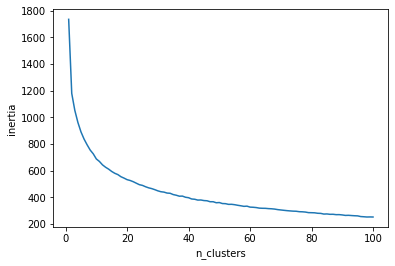

In [6]:
sns.lineplot(x=np.arange(1, 101), y=inertia_kmeans)
plt.xlabel("n_clusters")
plt.ylabel("inertia")

In [7]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(trip_advisor_users.drop("user", axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa18e8cb00>,
      dtype=object)

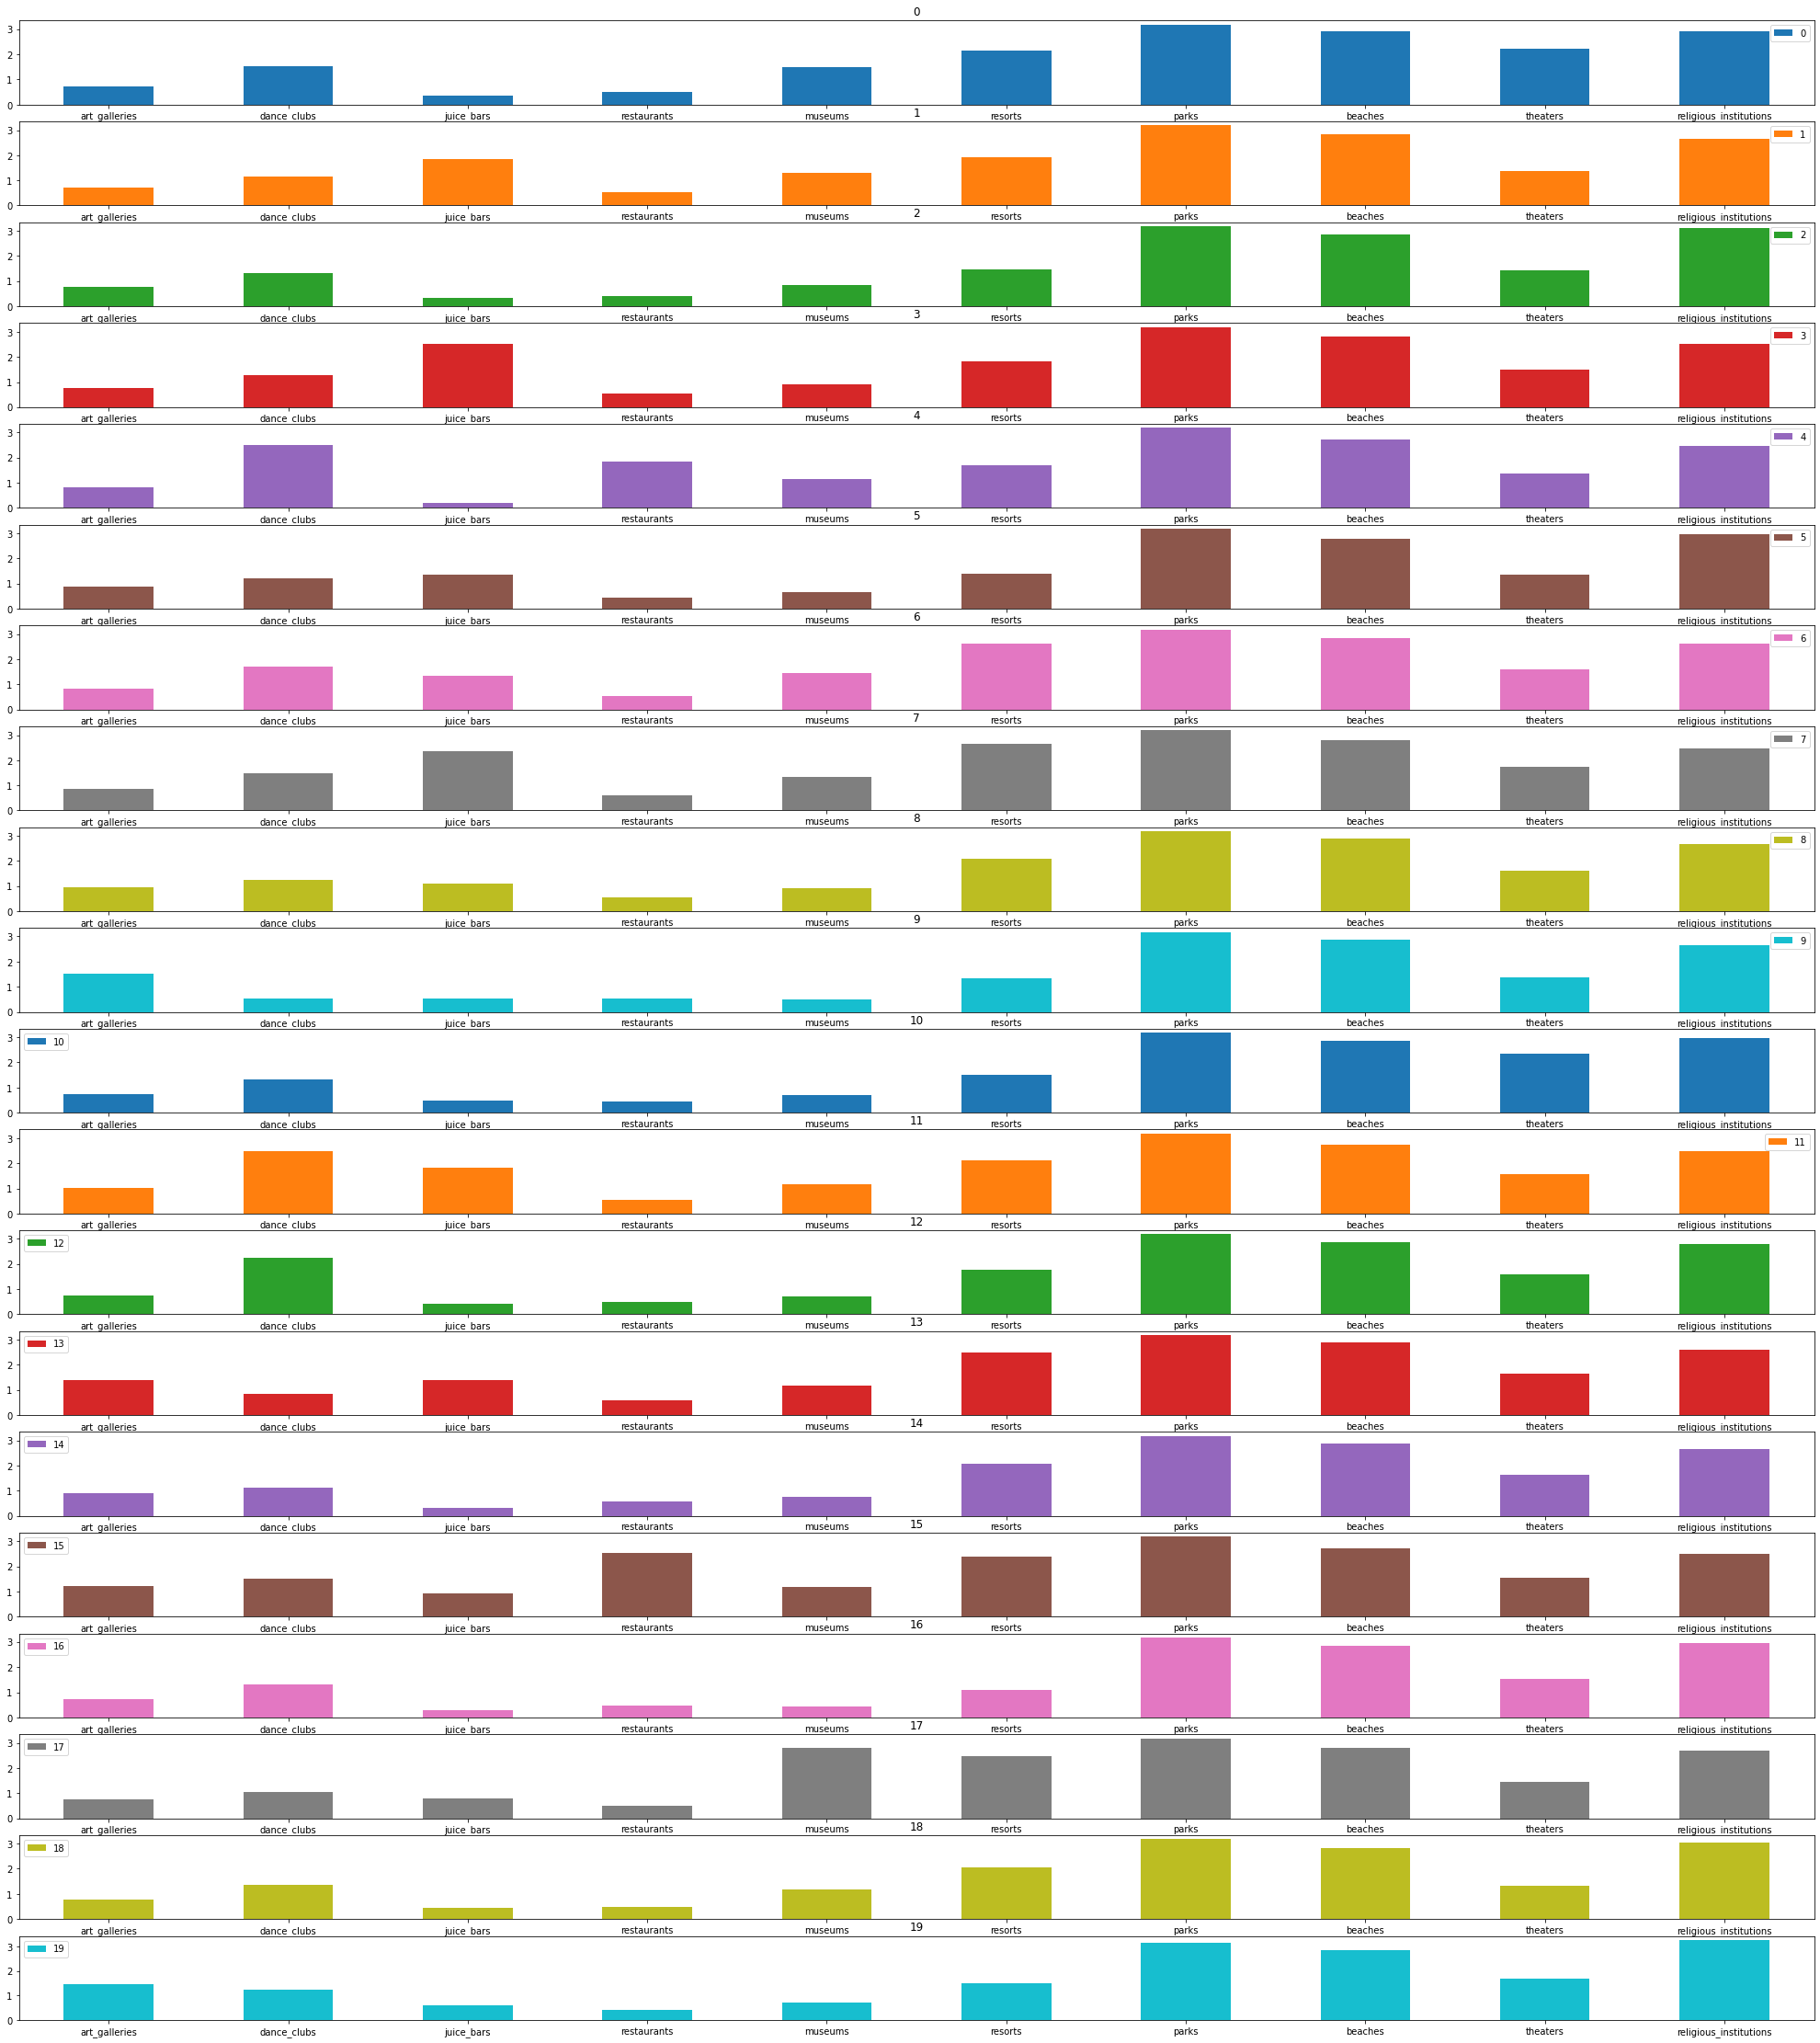

In [8]:
groups = pd.DataFrame(kmeans.cluster_centers_, columns=trip_advisor_users.drop("user", axis=1).columns)

groups.T.plot.bar(subplots=True, figsize=(35, 40), sharex=False, rot=0)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.8351738743798267, 0.8351738743798267, 0.0],
  [0.0, 0.5686983345618176, 0.5686983345618176, 0.0],
  [0.0, 0.6822935751305463, 0.6822935751305463, 0.5686983345618176],
  [0.0, 0.7057570704335071, 0.7057570704335071, 0.6822935751305463],
  [0.0, 0.8311072084990261, 0.8311072084990261, 0.7057570704335071],
  [0.0, 0.8326479090176673, 0.8326479090176673, 0.0],
  [0.8311072084990261,
   0.8377076726149113,
   0.8377076726149113,
   0.8326479090176673],
  [0.0, 0.8953339598141317, 0.8953339598141317, 0.8377076726149113],
  [0.8351738743798267,
   0.8983834391609681,
   0.8983834391609681,
   0.8953339598141317],
  [0.0, 0.9013115185729695, 0.9013115185729695, 0.8983834391609681],
  [0.0, 0.9464059456191635, 0.9464059456191635, 0.9013115185729695],
  [0.0, 0.9973602979583037, 0.9973602979583037, 0.9464059456191635],
  [0.0, 1.0

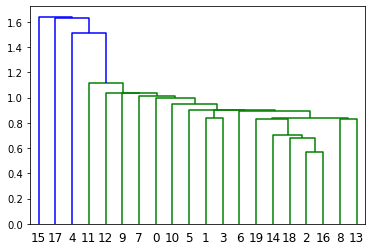

In [10]:
from  scipy.cluster.hierarchy import dendrogram, linkage

distance_matrix = linkage(groups)

dendrogram(distance_matrix)

## Conclusions

- for every park, beaches and religous institutions in East Asia, that are already visited and have good grade, you can recomend for all the users in East Asia.

- you can recommend the best place  by recommending to the user the places that have good grades and that has also been visited by people who are part of the same group as him.

- and if there is a lack of options of people of the same group of the user, you can recomend places that are good for similar groups.

